In [1]:
!python -m pip install -q amazon-textract-response-parser --upgrade
!python -m pip install -q amazon-textract-caller --upgrade
!python -m pip install -q amazon-textract-prettyprinter --upgrade

In [4]:
import boto3
import sagemaker
import os
from io import BytesIO
from PIL import Image
from IPython.display import Image, display, JSON, IFrame
from trp import Document
from PIL import Image as PImage, ImageDraw
import time
from IPython.display import IFrame


## Un strutured document processing

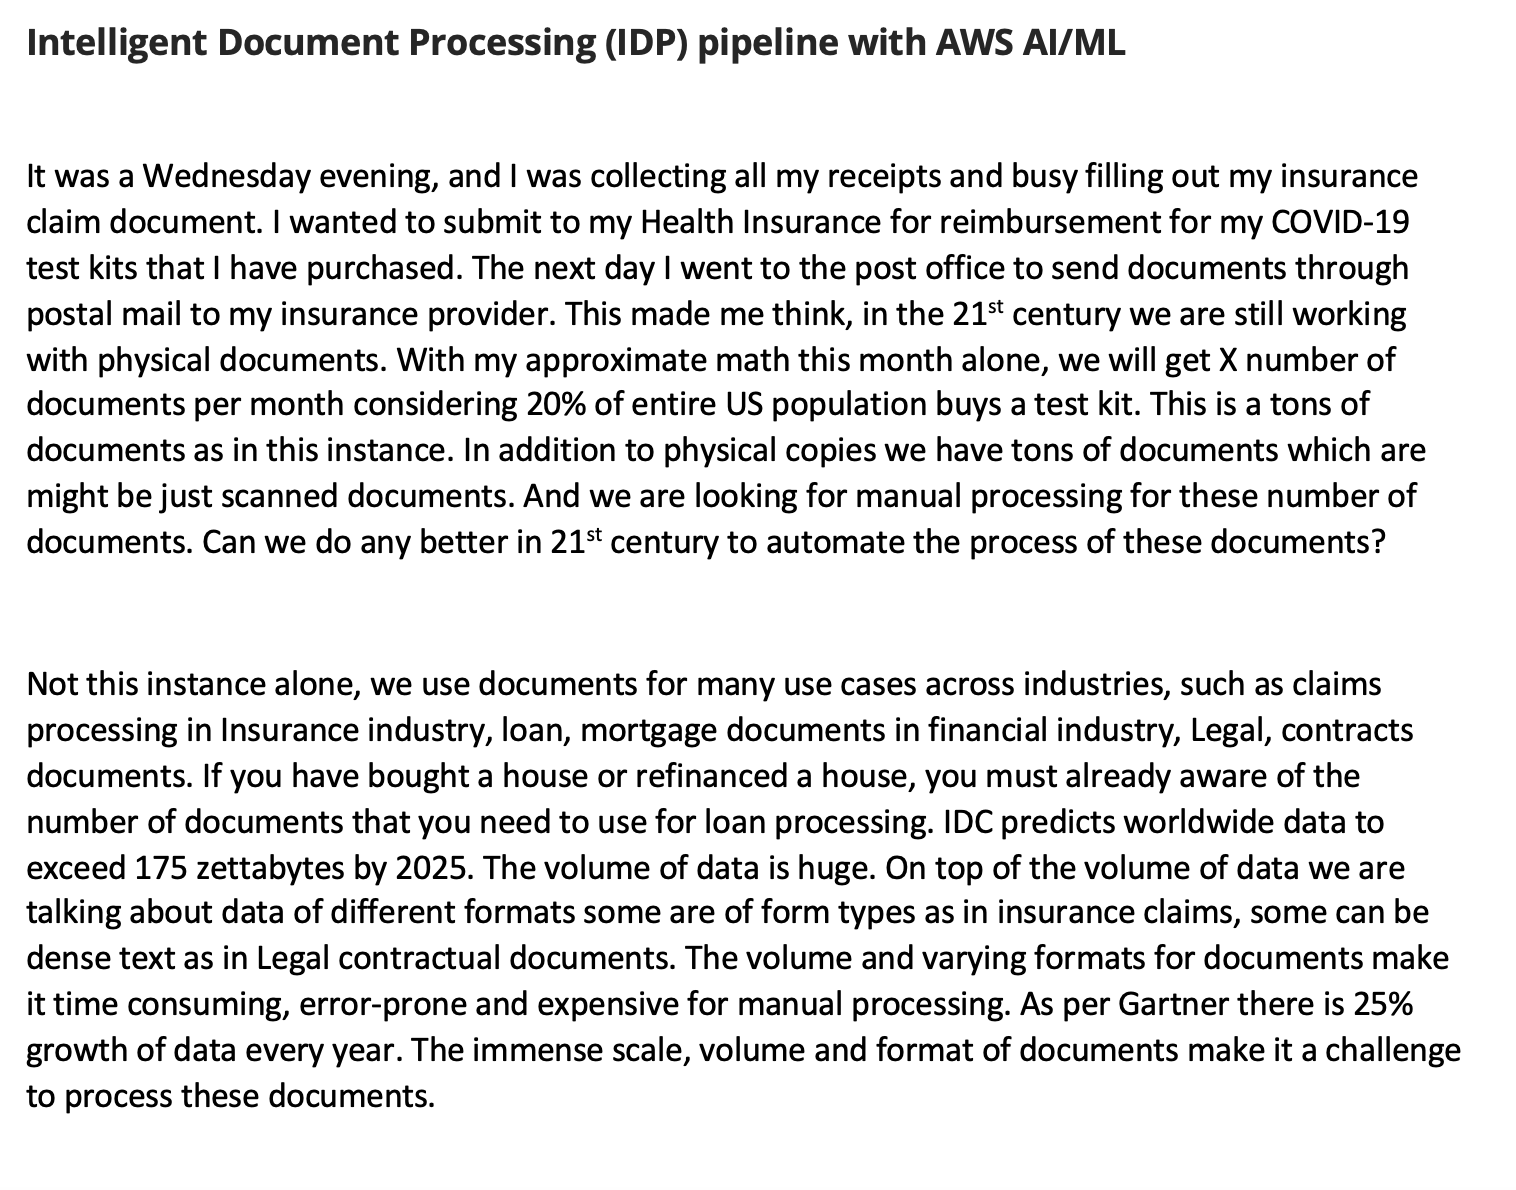

In [5]:
# Document
documentName = "unstrcutured.png"
display(Image(filename=documentName))


In [7]:
#Extract dense Text from scanned document

# Amazon Textract client
textract = boto3.client('textract')

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.detect_document_text(Document={'Bytes': imageBytes})

# Print detected text
for item in response["Blocks"]:
    if item["BlockType"] == "LINE":
        print (item["Text"])

Intelligent Document Processing (IDP) pipeline with AWS AI/ML
It was a Wednesday evening, and I was collecting all my receipts and busy filling out my insurance
claim
document. I wanted to submit to my Health Insurance for reimbursement for my COVID-19
test kits that I have purchased. The next day I went to the post office to send documents through
postal mail to my insurance provider. This made me think, in the 21st century we are still working
with physical documents. With my approximate math this month alone, we will get X number of
documents per month considering 20% of entire US population buys a test kit. This is a tons of
documents as in this instance. In addition to physical copies we have tons of documents which are
might be just scanned documents. And we are looking for manual processing for these number of
documents. Can we do any better in 21st century to automate the process of these
documents?
Not this instance alone, we use documents for many use cases across industries,

In [20]:
!python -m pip install amazon-textract-caller
!python -m pip install amazon-textract-prettyprinter


import json
from trp import Document
from textractcaller import call_textract, Textract_Features
from textractprettyprinter.t_pretty_print import Pretty_Print_Table_Format, Textract_Pretty_Print, get_string

textract_json = call_textract(input_document=documentName)



print(get_string(textract_json=textract_json,
               output_type=[Textract_Pretty_Print.LINES]))


Name: Jane Doe
Address:
111 Anycity,
AnyState 11111
Current Role : Engineer
Is Employed



## Semi Structured Document extraction

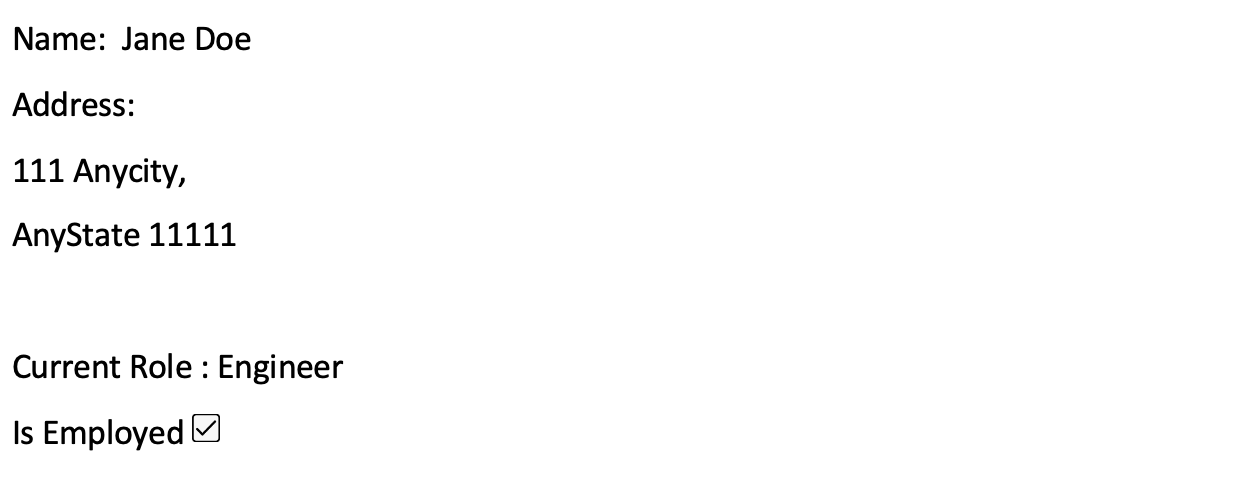

|----------------|-----------------------------|
| Key            | Value                       |
| Current Role : | Engineer                    |
| Is Employed    | SELECTED                    |
| Name:          | Jane Doe                    |
| Address:       | 111 Anycity, AnyState 11111 |




In [22]:
# Document
documentName = "semi-structured.png"
display(Image(filename=documentName))

textract_json = call_textract(input_document=documentName, features=[Textract_Features.FORMS])
print(get_string(textract_json=textract_json,
              output_type=[Textract_Pretty_Print.FORMS]))




##  Structured Document extraction

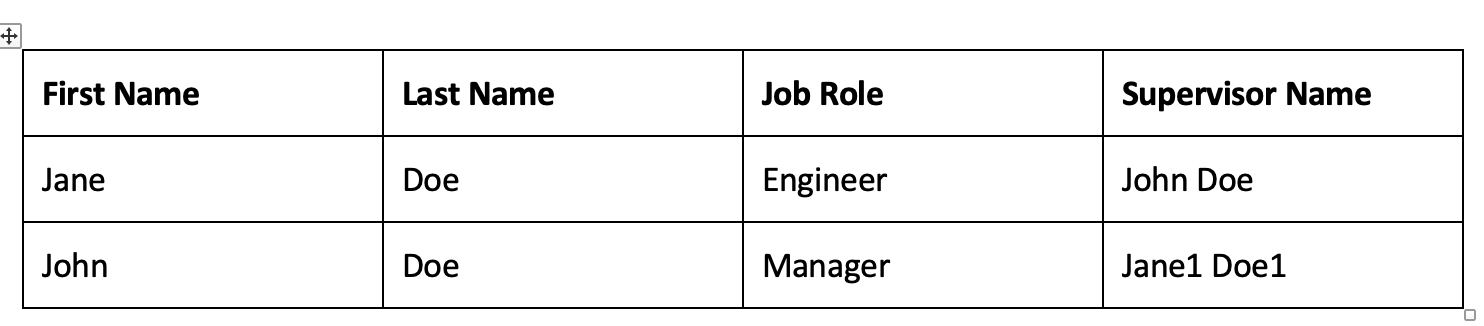

|------------|-----------|----------|-----------------|
| First Name | Last Name | Job Role | Supervisor Name |
| Jane       | Doe       | Engineer | John Doe        |
| John       | Doe       | Manager  | Jane1 Doe1      |




In [27]:
# Document
documentName = "structured.png"
display(Image(filename=documentName))

textract_json = call_textract(input_document=documentName, features=[Textract_Features.TABLES])
print(get_string(textract_json=textract_json,
              output_type=[Textract_Pretty_Print.TABLES]))


## ID Document [Driver's License ] Processing

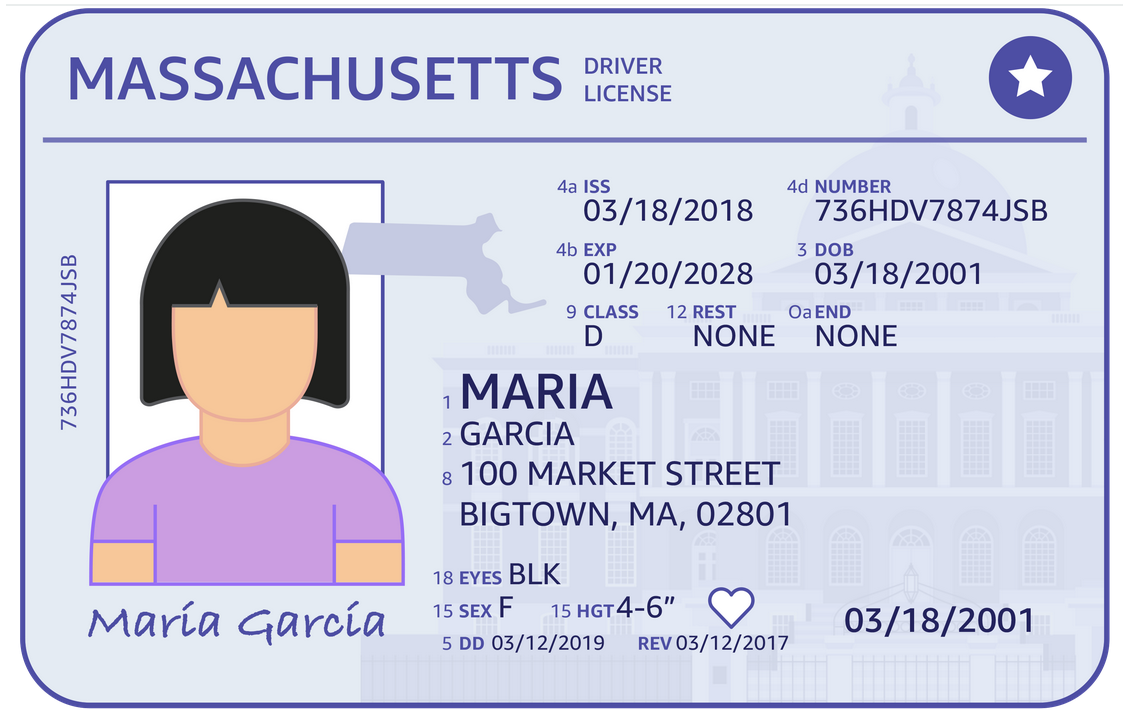

{'IdentityDocuments': [{'DocumentIndex': 1, 'IdentityDocumentFields': [{'Type': {'Text': 'FIRST_NAME'}, 'ValueDetection': {'Text': 'GARCIA', 'Confidence': 99.47561645507812}}, {'Type': {'Text': 'LAST_NAME'}, 'ValueDetection': {'Text': 'MARIA', 'Confidence': 98.98646545410156}}, {'Type': {'Text': 'MIDDLE_NAME'}, 'ValueDetection': {'Text': '', 'Confidence': 99.30181884765625}}, {'Type': {'Text': 'SUFFIX'}, 'ValueDetection': {'Text': '', 'Confidence': 99.6449203491211}}, {'Type': {'Text': 'CITY_IN_ADDRESS'}, 'ValueDetection': {'Text': 'BIGTOWN', 'Confidence': 98.1953353881836}}, {'Type': {'Text': 'ZIP_CODE_IN_ADDRESS'}, 'ValueDetection': {'Text': '02801', 'Confidence': 98.87460327148438}}, {'Type': {'Text': 'STATE_IN_ADDRESS'}, 'ValueDetection': {'Text': 'MA', 'Confidence': 99.50767517089844}}, {'Type': {'Text': 'STATE_NAME'}, 'ValueDetection': {'Text': 'MASSACHUSETTS', 'Confidence': 98.2347640991211}}, {'Type': {'Text': 'DOCUMENT_NUMBER'}, 'ValueDetection': {'Text': '736HDV7874JSB', 'Con

In [40]:
# Document
documentName = "dl.png"
display(Image(filename=documentName))

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_id(
    DocumentPages=[{"Bytes":imageBytes}]
)

print(response)

In [42]:


import json
print(json.dumps(response, indent=2))



{
  "IdentityDocuments": [
    {
      "DocumentIndex": 1,
      "IdentityDocumentFields": [
        {
          "Type": {
            "Text": "FIRST_NAME"
          },
          "ValueDetection": {
            "Text": "GARCIA",
            "Confidence": 99.47561645507812
          }
        },
        {
          "Type": {
            "Text": "LAST_NAME"
          },
          "ValueDetection": {
            "Text": "MARIA",
            "Confidence": 98.98646545410156
          }
        },
        {
          "Type": {
            "Text": "MIDDLE_NAME"
          },
          "ValueDetection": {
            "Text": "",
            "Confidence": 99.30181884765625
          }
        },
        {
          "Type": {
            "Text": "SUFFIX"
          },
          "ValueDetection": {
            "Text": "",
            "Confidence": 99.6449203491211
          }
        },
        {
          "Type": {
            "Text": "CITY_IN_ADDRESS"
          },
          "ValueDetection": {
  

## ID Document [ US Passport] Accurate Extraction

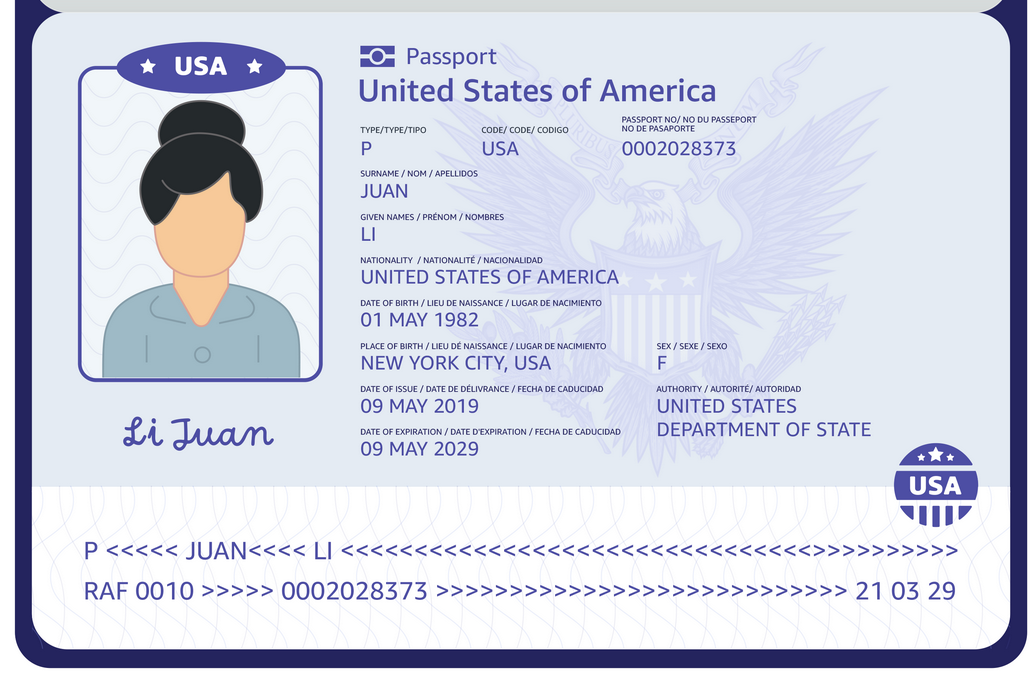

{'IdentityDocuments': [{'DocumentIndex': 1, 'IdentityDocumentFields': [{'Type': {'Text': 'FIRST_NAME'}, 'ValueDetection': {'Text': 'JUAN', 'Confidence': 71.55193328857422}}, {'Type': {'Text': 'LAST_NAME'}, 'ValueDetection': {'Text': 'JUAN', 'Confidence': 99.11465454101562}}, {'Type': {'Text': 'MIDDLE_NAME'}, 'ValueDetection': {'Text': '', 'Confidence': 99.30574035644531}}, {'Type': {'Text': 'SUFFIX'}, 'ValueDetection': {'Text': '', 'Confidence': 99.45903778076172}}, {'Type': {'Text': 'CITY_IN_ADDRESS'}, 'ValueDetection': {'Text': '', 'Confidence': 99.61920166015625}}, {'Type': {'Text': 'ZIP_CODE_IN_ADDRESS'}, 'ValueDetection': {'Text': '', 'Confidence': 99.65306091308594}}, {'Type': {'Text': 'STATE_IN_ADDRESS'}, 'ValueDetection': {'Text': '', 'Confidence': 99.6412124633789}}, {'Type': {'Text': 'STATE_NAME'}, 'ValueDetection': {'Text': '', 'Confidence': 99.64718627929688}}, {'Type': {'Text': 'DOCUMENT_NUMBER'}, 'ValueDetection': {'Text': '0002028373', 'Confidence': 97.696533203125}}, {'

In [46]:
# Document
documentName = "passport.png"
display(Image(filename=documentName))

with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

response = textract.analyze_id(
    DocumentPages=[{"Bytes":imageBytes}]
)

print(response)
import json
print(json.dumps(response, indent=2))

## Receipt Document Accurate Extraction

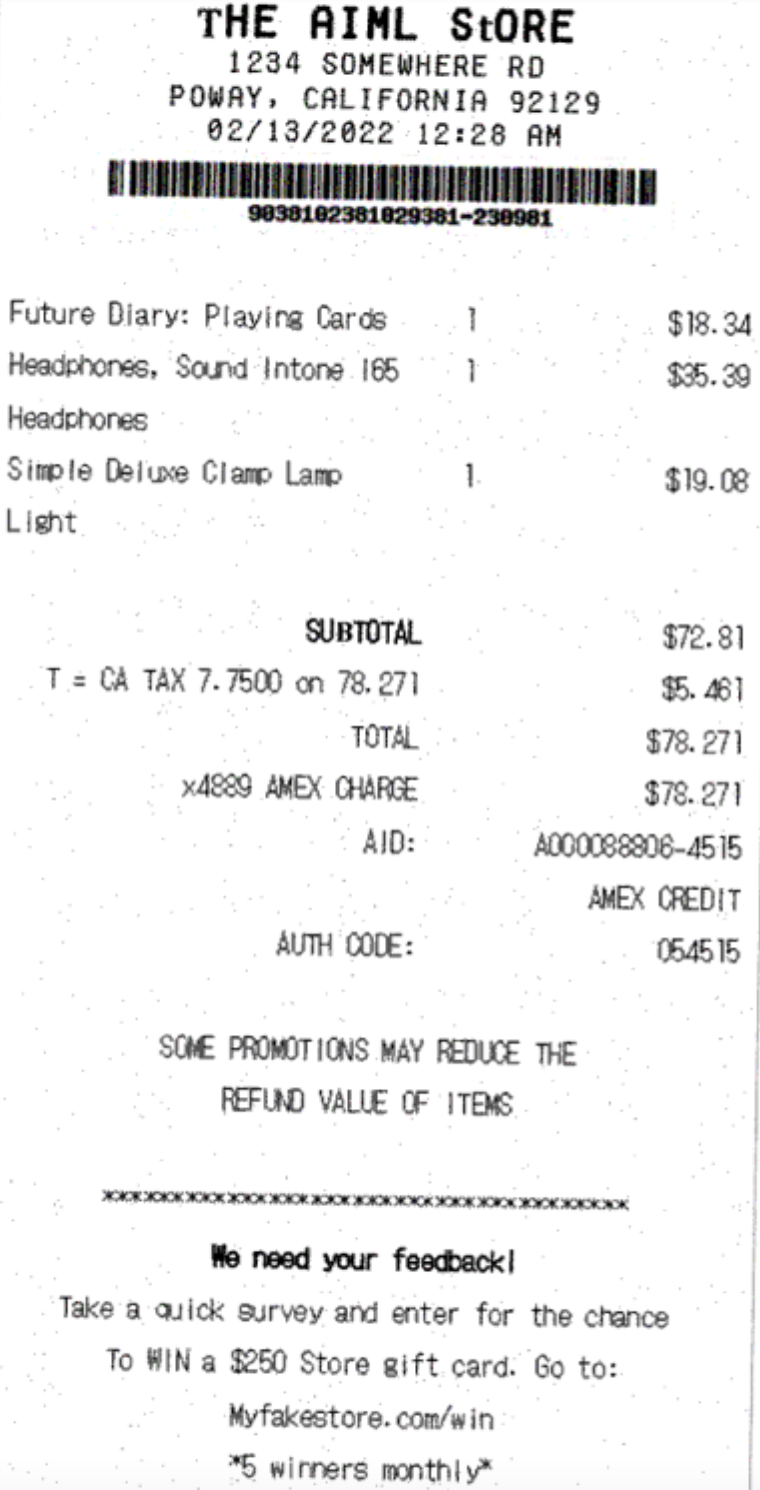

{'DocumentMetadata': {'Pages': 1}, 'ExpenseDocuments': [{'ExpenseIndex': 1, 'SummaryFields': [{'Type': {'Text': 'VENDOR_NAME', 'Confidence': 99.84497833251953}, 'ValueDetection': {'Text': 'THE AIML StORE', 'Geometry': {'BoundingBox': {'Width': 0.503549337387085, 'Height': 0.03130369260907173, 'Left': 0.2559385299682617, 'Top': 0.0}, 'Polygon': [{'X': 0.25694891810417175, 'Y': 0.0}, {'X': 0.7594878673553467, 'Y': 0.00446300208568573}, {'X': 0.7584774494171143, 'Y': 0.03130369260907173}, {'X': 0.2559385299682617, 'Y': 0.026381932199001312}]}, 'Confidence': 99.83383178710938}, 'PageNumber': 1}, {'Type': {'Text': 'OTHER', 'Confidence': 89.0}, 'LabelDetection': {'Text': 'AUTH CODE:', 'Geometry': {'BoundingBox': {'Width': 0.18461240828037262, 'Height': 0.02193770371377468, 'Left': 0.36153751611709595, 'Top': 0.6233586668968201}, 'Polygon': [{'X': 0.36229556798934937, 'Y': 0.6233586668968201}, {'X': 0.5461499094963074, 'Y': 0.6251593232154846}, {'X': 0.5453919172286987, 'Y': 0.645296394824981

In [47]:
# Document

documentName = "receipt.png"
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_expense(Document={'Bytes': imageBytes})
print(response)

import json
print(json.dumps(response, indent=2))


## Invoices Document Accurate Extraction

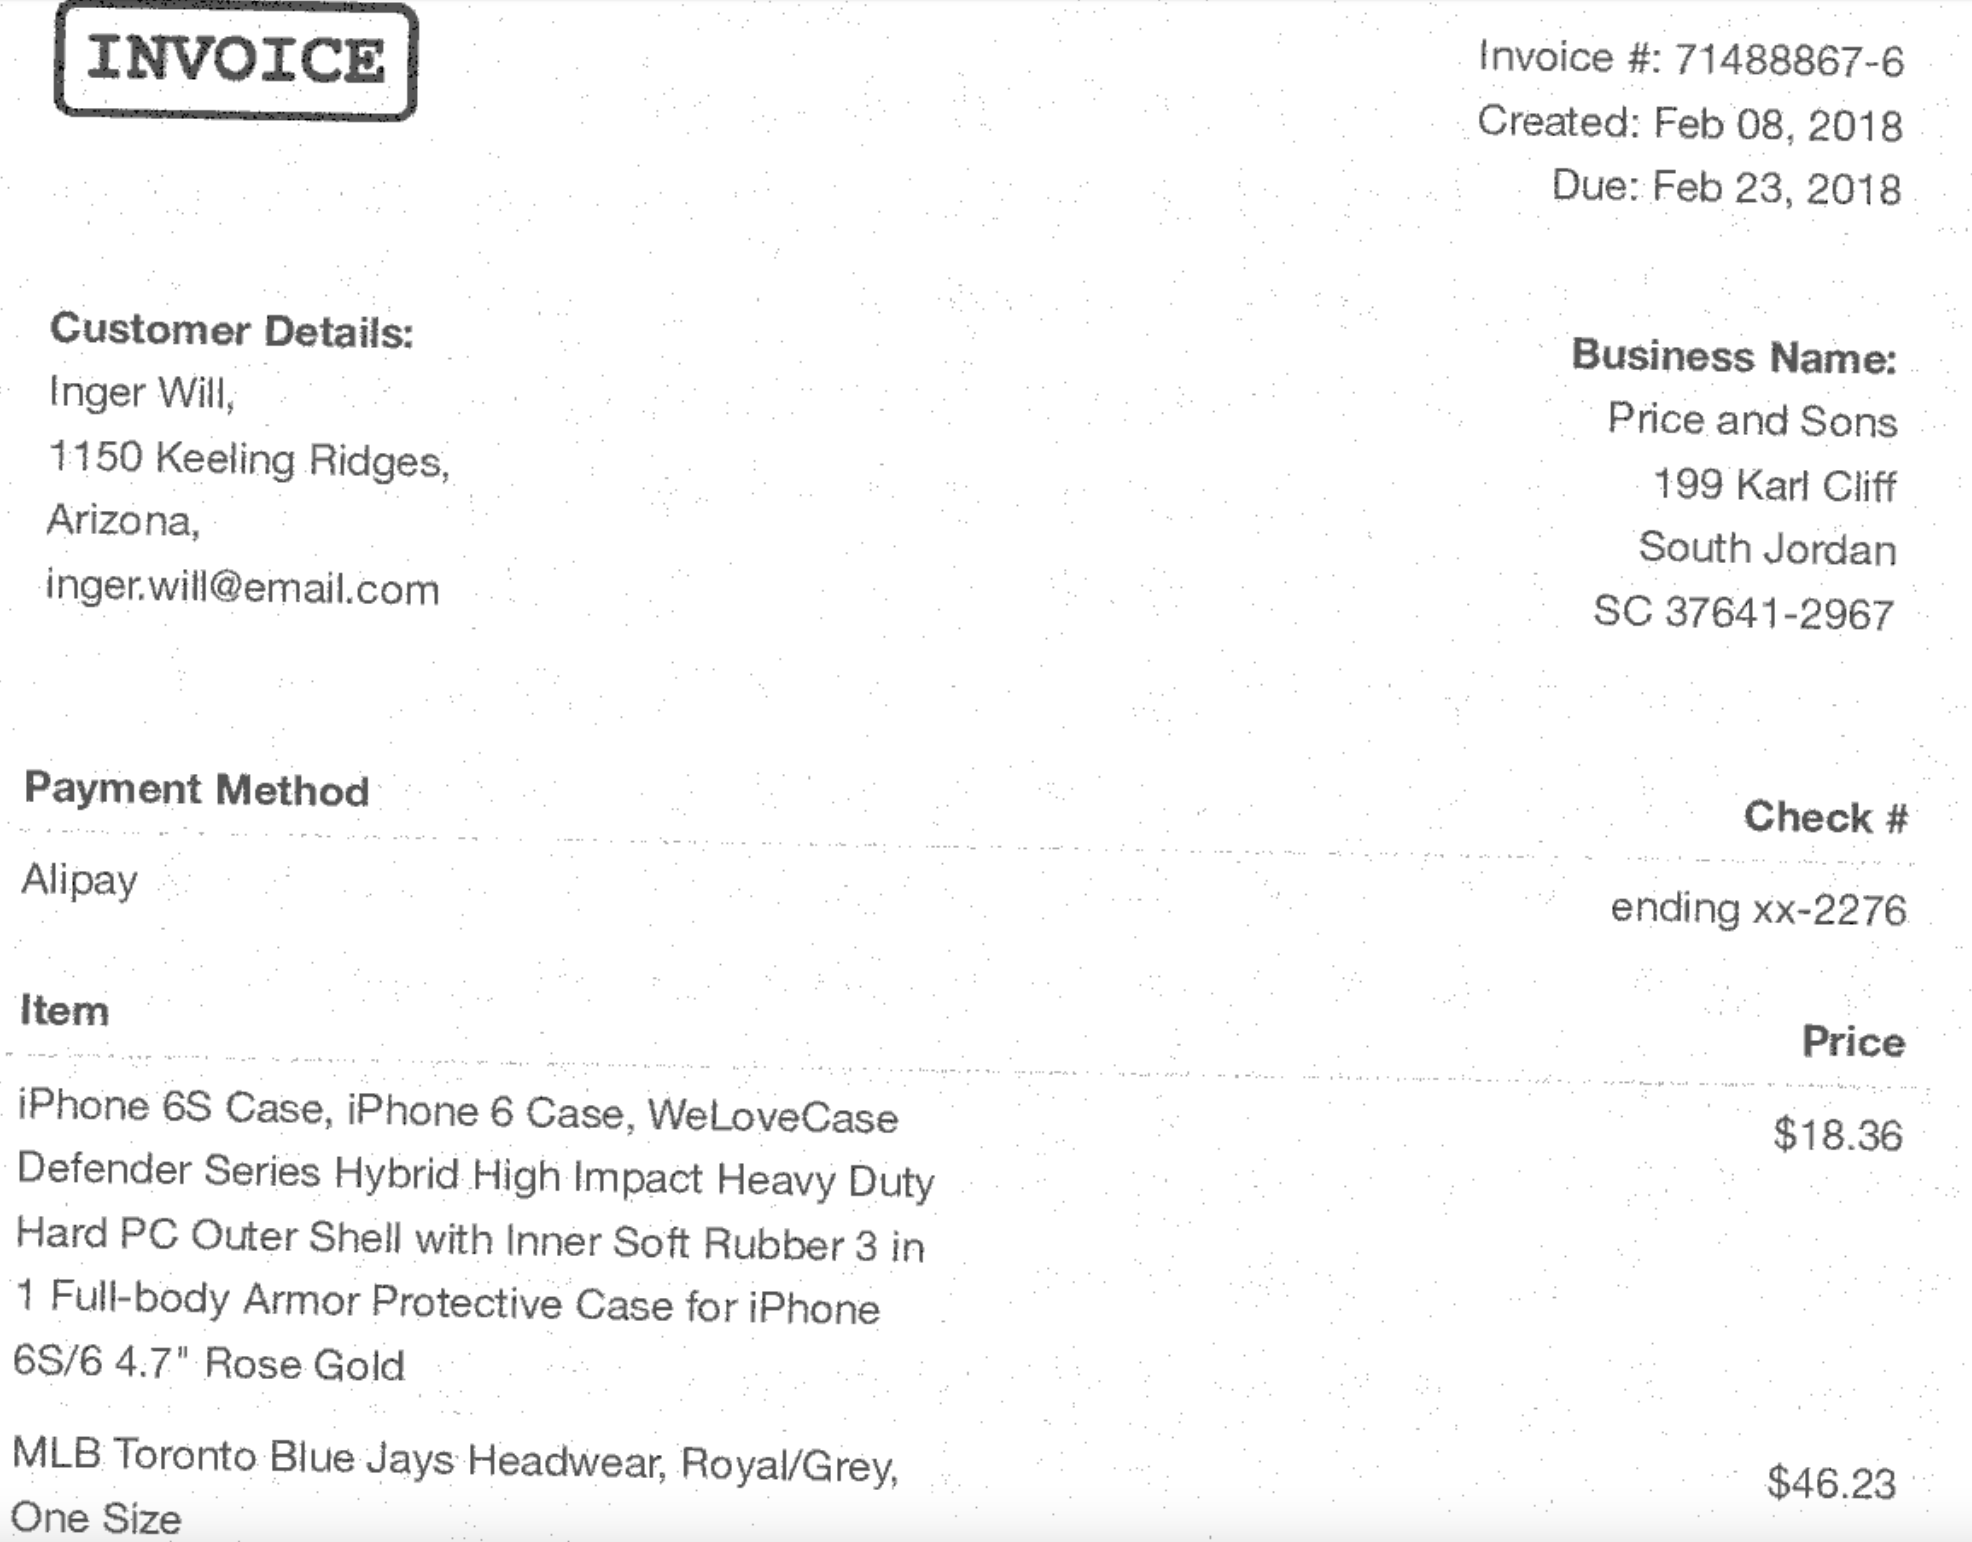

{'DocumentMetadata': {'Pages': 1}, 'ExpenseDocuments': [{'ExpenseIndex': 1, 'SummaryFields': [{'Type': {'Text': 'OTHER', 'Confidence': 87.5}, 'LabelDetection': {'Text': 'Payment Method', 'Geometry': {'BoundingBox': {'Width': 0.17776434123516083, 'Height': 0.03428881987929344, 'Left': 0.011818407103419304, 'Top': 0.4970138967037201}, 'Polygon': [{'X': 0.012267852202057838, 'Y': 0.4970138967037201}, {'X': 0.18958275020122528, 'Y': 0.5013679265975952}, {'X': 0.18913330137729645, 'Y': 0.5313026905059814}, {'X': 0.011818407103419304, 'Y': 0.5269486904144287}]}, 'Confidence': 87.4721908569336}, 'ValueDetection': {'Text': 'Alipay', 'Geometry': {'BoundingBox': {'Width': 0.061130717396736145, 'Height': 0.030865272507071495, 'Left': 0.010131187736988068, 'Top': 0.5569228529930115}, 'Polygon': [{'X': 0.010572228580713272, 'Y': 0.5569228529930115}, {'X': 0.07126190513372421, 'Y': 0.5584130883216858}, {'X': 0.0708208680152893, 'Y': 0.5877881050109863}, {'X': 0.010131187736988068, 'Y': 0.58629786968

In [48]:
# Document

documentName = "invoice.png"
display(Image(filename=documentName))

# Read document content
with open(documentName, 'rb') as document:
    imageBytes = bytearray(document.read())

# Call Amazon Textract
response = textract.analyze_expense(Document={'Bytes': imageBytes})
print(response)

import json
print(json.dumps(response, indent=2))


## End of Extraction 

In [55]:
data_bucket = sagemaker.Session().default_bucket()
region = boto3.session.Session().region_name
account_id = boto3.client('sts').get_caller_identity().get('Account')

os.environ["BUCKET"] = data_bucket
os.environ["REGION"] = region
role = sagemaker.get_execution_role()

# Amazon S3 client
s3=boto3.client('s3')

# Amazon Textract client
textract = boto3.client('textract')
translate = boto3.client('translate')

print(f"SageMaker role is: {role}\nDefault SageMaker Bucket: s3://{data_bucket}")

SageMaker role is: arn:aws:iam::965425568475:role/service-role/AmazonSageMaker-ExecutionRole-20201030T135016
Default SageMaker Bucket: s3://sagemaker-us-east-2-965425568475


### Upload the pdf files to S3
---

In [26]:
!aws s3 cp data s3://{data_bucket}/idp/textract/ge --recursive --only-show-errors

In [28]:
!aws s3 ls s3://{data_bucket}/idp/textract/ge/

2022-04-01 17:35:21     291040 01-tech-info-letter.pdf
2022-04-01 17:35:21     821668 02-executive-summary.pdf


In [29]:
# Document
documentName = f"s3://{data_bucket}/idp/textract/ge/01-tech-info-letter.pdf"

In [30]:
IFrame("./data/01-tech-info-letter.pdf", width=600, height=700)

### Call textract to get the text and bounding boxes
---

Read the file from S3 and open it using `fitz` (PyMuPDF). This will allow us to get the width and height of the PDF's individual pages.

In [47]:
s3_resource = boto3.resource('s3')
obj = s3_resource.Object(data_bucket, 'idp/textract/ge/01-tech-info-letter.pdf')
fs = obj.get()['Body'].read()
pdfdoc = fitz.open("pdf", stream=BytesIO(fs))

dims = []
for i,page in enumerate(pdfdoc):
    dims.append((page.rect.width,page.rect.height))
    print(f"Page {i}: Width= {page.rect.width}, Height={page.rect.height}")
dims

Page 0: Width= 612.0, Height=792.0
Page 1: Width= 612.0, Height=792.0


[(612.0, 792.0), (612.0, 792.0)]

In [53]:
from textractoverlayer.t_overlay import DocumentDimensions, get_bounding_boxes
from textractcaller.t_call import Textract_Features, Textract_Types, call_textract
import fitz

# page 1's dimension
page = dims[0]

doc = call_textract(input_document=documentName)
document_dimension:DocumentDimensions = DocumentDimensions(doc_width=page[0], doc_height=page[1])
    
#Get the bounding boxes and text for Lines in the document, WORD can also be used for individual words using extract_Types.WORD
overlay=[Textract_Types.LINE]

bounding_box_list = get_bounding_boxes(textract_json=doc, document_dimensions=document_dimension, overlay_features=overlay)
bounding_box_list

[BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=439, ymin=51, xmax=555, ymax=63),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=59, ymin=98, xmax=206, ymax=109),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=501, ymin=98, xmax=552, ymax=109),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=60, ymin=114, xmax=172, ymax=125),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=466, ymin=114, xmax=552, ymax=124),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=467, ymin=127, xmax=552, ymax=136),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=499, ymin=136, xmax=552, ymax=144),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=172, ymin=148, xmax=440, ymax=162),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=54, ymin=188, xmax=474, ymax=199),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=54, ymin=204, xmax=343, ymax=215)

Translate extracted text and get the bounding boxes to write an overlay on the file.

In [60]:
result=[]
for bbox in bounding_box_list:
    trresponse = translate.translate_text(
                    Text=f'{bbox.text}',
                    SourceLanguageCode='en',
                    TargetLanguageCode='zh'
                )
    obj={}
    obj['page_number']= f'{bbox.page_number}'
    obj['en'] = f'{bbox.text}'
    obj['zh'] = f"{trresponse['TranslatedText']}"
    obj['bbox'] = [bbox.xmin,bbox.ymin,bbox.xmax,bbox.ymax]
    result.append(obj)
    print(f'Page {bbox.page_number} | {bbox.text} | Polygon = ({bbox.xmin},{bbox.ymin},{bbox.xmax},{bbox.ymax}) | Translation = {trresponse["TranslatedText"]}')

Page 1 | GE Power & Water | Polygon = (439,51,555,63) | Translation = GE 电力与水务
Page 1 | THERMAL ENGINEERING | Polygon = (59,98,206,109) | Translation = 热工程
Page 1 | TIL 1903 | Polygon = (501,98,552,109) | Translation = 直到 1903 年
Page 1 | PRODUCT SERVICE | Polygon = (60,114,172,125) | Translation = 产品服务
Page 1 | 21 AUGUST 2013 | Polygon = (466,114,552,124) | Translation = 2013 年 8 月 21 日
Page 1 | Compliance Category - A | Polygon = (467,127,552,136) | Translation = 合规类别-A
Page 1 | Timing Code 2 | Polygon = (499,136,552,144) | Translation = 计时码2
Page 1 | TECHNICAL INFORMATION LETTER | Polygon = (172,148,440,162) | Translation = 技术信息函
Page 1 | LUBE OIL SYSTEM EMERGENCY STANDBY PUMP OUTLET CHECK VALVE | Polygon = (54,188,474,199) | Translation = 润滑油系统应急备用泵出口单向阀
Page 1 | MODIFICATION AND PERIODIC SYSTEM TESTING | Polygon = (54,204,343,215) | Translation = 修改和定期系统测试
Page 1 | APPLICATION | Polygon = (53,232,123,241) | Translation = 申请
Page 1 | Selected Steam Turbines with emergency DC lube oi

In [64]:
import json
with open("./doc-01-result.json", "w") as file:
    file.write(json.dumps(result))

## Read and prepare the second document

In [113]:
documentName = f"s3://{data_bucket}/idp/textract/ge/02-executive-summary.pdf"

In [114]:
s3_resource = boto3.resource('s3')
obj = s3_resource.Object(data_bucket, 'idp/textract/ge/02-executive-summary.pdf')
fs = obj.get()['Body'].read()
pdfdoc = fitz.open("pdf", stream=BytesIO(fs))

dims = []
for i,page in enumerate(pdfdoc):
    dims.append((page.rect.width,page.rect.height))
    print(f"Page {i}: Width= {page.rect.width}, Height={page.rect.height}")
dims

Page 0: Width= 612.0, Height=792.0
Page 1: Width= 612.0, Height=792.0
Page 2: Width= 612.0, Height=792.0
Page 3: Width= 612.0, Height=792.0


[(612.0, 792.0), (612.0, 792.0), (612.0, 792.0), (612.0, 792.0)]

In [115]:
from textractoverlayer.t_overlay import DocumentDimensions, get_bounding_boxes
from textractcaller.t_call import Textract_Features, Textract_Types, call_textract
import fitz

# page 1's dimension
page = dims[0]

doc = call_textract(input_document=documentName)
document_dimension:DocumentDimensions = DocumentDimensions(doc_width=page[0], doc_height=page[1])
    
#Get the bounding boxes and text for Lines in the document, WORD can also be used for individual words using extract_Types.WORD
overlay=[Textract_Types.LINE]

bounding_box_list = get_bounding_boxes(textract_json=doc, document_dimensions=document_dimension, overlay_features=overlay)
bounding_box_list

[BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=73, ymin=113, xmax=534, ymax=155),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=60, ymin=220, xmax=139, ymax=234),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=329, ymin=217, xmax=543, ymax=228),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=329, ymin=230, xmax=543, ymax=241),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=328, ymin=243, xmax=543, ymax=254),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=329, ymin=257, xmax=543, ymax=267),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=59, ymin=273, xmax=258, ymax=288),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=329, ymin=270, xmax=543, ymax=280),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=329, ymin=284, xmax=543, ymax=294),
 BoundingBox(box_type='Textract_Types.LINE', page_number=1, xmin=58, ymin=293, xmax=248, ymax=

Translate extracted text and get the bounding boxes to write an overlay on the file.

In [116]:
result2=[]
for bbox in bounding_box_list:
    trresponse = translate.translate_text(
                    Text=f'{bbox.text}',
                    SourceLanguageCode='en',
                    TargetLanguageCode='zh'
                )
    obj={}
    obj['page_number']= f'{bbox.page_number}'
    obj['en'] = f'{bbox.text}'
    obj['zh'] = f"{trresponse['TranslatedText']}"
    obj['bbox'] = [bbox.xmin,bbox.ymin,bbox.xmax,bbox.ymax]
    result2.append(obj)
    print(f'Page {bbox.page_number} | {bbox.text} | Polygon = ({bbox.xmin},{bbox.ymin},{bbox.xmax},{bbox.ymax}) | Translation = {trresponse["TranslatedText"]}')

Page 1 | 03. EXECUTIVE SUMMARY | Polygon = (73,113,534,155) | Translation = 03。执行摘要
Page 1 | Our Purpose | Polygon = (60,220,139,234) | Translation = 我们的宗旨
Page 1 | 2020 has been a year of turbulence & | Polygon = (329,217,543,228) | Translation = 2020年是动荡的一年
Page 1 | uncertainty! It's also has been a year of | Polygon = (329,230,543,241) | Translation = 不确定性！也已经一年了
Page 1 | transformation for us as Emerging Region IT | Polygon = (328,243,543,254) | Translation = 我们作为新兴地区 IT 的转型
Page 1 | team. The team came together to support four | Polygon = (329,257,543,267) | Translation = 球队。团队聚集在一起支持四个
Page 1 | We bring the right people and | Polygon = (59,273,258,288) | Translation = 我们带来合适的人才
Page 1 | of the six Gas Power regions - MENASA, APAC, | Polygon = (329,270,543,280) | Translation = 在六个天然气发电区域中-中东和北非航天局、亚太地区、
Page 1 | China & SSA IT  in less than 2 months as a team, | Polygon = (329,284,543,294) | Translation = 中国和SSA IT团队在不到2个月的时间内，
Page 1 | technology together to build | Polygon = (58

In [117]:
import json
with open("./doc-02-result.json", "w") as file:
    file.write(json.dumps(result2))

## Redact and overlay translated text

We will use the `pdfdoc` variable that we initialized before using `fitz`

In [106]:
# pdfdoc --> fitz variable created with the PDF file from S3
# White 1, 1, 1
# Black 0,0,0
white = (1, 1, 1)
black = (0,0,0)

pdfdocument = fitz.open("./data/01-tech-info-letter.pdf")
#Perform redaction
for p, page in enumerate(pdfdocument):
    p += 1 
    for res in result:   
        r = fitz.Rect(res['bbox'][0]-5, res['bbox'][1]-5, res['bbox'][2]+5, res['bbox'][3]+5)
        t = res['zh']
        if int(res['page_number']) == p:            
            shape = page.new_shape()
            shape.draw_rect(r)
            shape.finish(width = 0.3, color=white, fill=white)
            rc = shape.insert_textbox(r, t, color = black, fontname="china-s", fontsize=8)

            #rc of less than 0 will mean some texts in Chinese do not have sufficient space
            if rc < 0:
                print(t)
            shape.commit()
    
pdfdocument.save("./01-tech-info-letter-translated.pdf")


直到 1903 年
que
20
74
100
27
248
124
124
1000
242
170
16
16
118
124
第 2 页，共 5 页


In [119]:
white = (1, 1, 1)
black = (0,0,0)

pdfdocument = fitz.open("./data/02-executive-summary.pdf")
#Perform redaction
for p, page in enumerate(pdfdocument):
    p += 1 
    for res in result2:   
        r = fitz.Rect(res['bbox'][0]-5, res['bbox'][1]-5, res['bbox'][2]+5, res['bbox'][3]+5)
        t = res['zh']
        if 'https://' not in res['en']: #avoid overlaying URLs
            if int(res['page_number']) == p:            
                shape = page.new_shape()
                shape.draw_rect(r)
                shape.finish(width = 0.3, color=white, fill=white)
                rc = shape.insert_textbox(r, t, color = black, fontname="china-s", fontsize=6)

                #rc of less than 0 will mean some texts in Chinese do not have sufficient space
                if rc < 0:
                    print(t)
                shape.commit()
    
pdfdocument.save("./02-executive-summary-translated.pdf")

12:2000 年 10 月
tot 100
520
Ponstration 14％
201/092
34％
L129664
@myCruntry
15,477
ALSERIA
23,727
3,100
